# P1 - Navigation

Submission by Jayanth Nair


This notebook details the implementation of a Double DQN Agent to solve the Banana Unity Environment. 
During training, this task was solved in 480 episodes

In [1]:
#importing necessary modules
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import matplotlib.pyplot as plt


from my_double_dqn_agent import DQNAgent

In [2]:
#importing unity environment
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
import torch

In [6]:
# creating the agent
agent = DQNAgent(state_size=37,action_size=4,seed=0)

In [7]:
def dqn(tag,agent=agent,n_episodes=1000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,brain_name=brain_name):
    """Deep Q-Learning.
    
    Params
    ======
        tag (str): a tag to name the final model
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        brain_name (str): brain name obtained from the unity environment
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0   
        for t in range(max_t):
            action = agent.act(state, eps).astype(np.int32)# use the agent to select an action
            env_info = env.step(action)[brain_name]        # execute action on environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # get the done flag
            agent.step(state, action, reward, next_state, done) # execute the step action as defined in the agent
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\rEnvironment solved in {} episodes'.format(i_episode))
            torch.save(agent.local_net.state_dict(),'{}-solved-checkpoint.pth'.format(tag,i_episode))
            break
    return scores

In [8]:
# start training
double_dqn_scores = dqn('double_dqn',n_episodes=2000)

Episode 100	Average Score: 0.42
Episode 200	Average Score: 5.41
Episode 300	Average Score: 8.17
Episode 400	Average Score: 11.87
Environment solved in 480 episodes


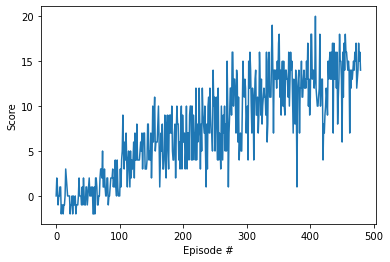

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(double_dqn_scores)), double_dqn_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [14]:
# to see our final agent in action, we need to define a new agent and...
agent = DQNAgent(state_size=37,action_size=4,seed=42)

In [15]:
# ...copy the parameters from our solved agent
agent.local_net.load_state_dict(torch.load("double_dqn-solved-checkpoint.pth"))

<All keys matched successfully>

In [16]:
# executing to see agent in action
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state).astype(np.int32)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [17]:
# close the environment
env.close()

The Double DQN agent worked very well with the hyperparameters chosen worked very well with this environment. 
The agent could be improved with better hyperparameters. The current hyperparameters were chosen by rough experimentation.  Implementing a prioritized experience replay buffer could also improve the performance.